In [107]:
# importing required libraries

import pandas as pd
import numpy as np
import os
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

In [108]:
# Reading the csv of 
prep = pd.read_csv("C:/Users/dhanu/Downloads/Stress-Predict-Dataset-main/Stress-Predict-Dataset-main/Processed_data/Improved_All_Combined_hr_rsp_binary.csv")

In [109]:
folder_path = 'C:/Users/dhanu/Downloads/Stress-Predict-Dataset-main/Stress-Predict-Dataset-main/Raw_data'

# Creation of empty list to store data
list = []



In [110]:
for i in range(1, 35):
    sub_folder = 'S{:02d}'.format(i)
    sub_folder_path = os.path.join(folder_path, sub_folder)

    # Read the csv files into dataframes
    acc_p = os.path.join(sub_folder_path, 'ACC.csv')
    acc = pd.read_csv(acc_p)
    new_column = {acc.columns[0]: 'x_axis', 
                        acc.columns[1]: 'y_axis',
                        acc.columns[2]: 'z_axis'}
    
#     acc data
    acc.reset_index(inplace=True, drop=True)
    acc['time'] = int(float(acc.columns[0])) - 1
    acc = acc.rename(columns=new_column)
    acc.drop(0, inplace=True)
    acc['time'] = acc['time'] + acc.index
    
    #BVP data

    bvp_p = os.path.join(sub_folder_path, 'BVP.csv')
    bvp = pd.read_csv(bvp_p)
    bvp.reset_index(inplace=True, drop=True)
    bvp['time'] = int(float(bvp.columns[0])) - 1
    bvp['time'] = bvp['time'] + bvp.index
    bvp = bvp.rename(columns={bvp.columns[0]: 'bvp'})
    bvp.drop(0, inplace=True)

    
#     HR data
    hr_p = os.path.join(sub_folder_path, 'HR.csv')
    hr = pd.read_csv(hr_p)
    hr.reset_index(inplace=True, drop=True)
    hr['time'] = int(float(hr.columns[0])) - 1
    hr['time'] = hr['time'] + hr.index
    hr.rename({hr.columns[0]: 'hr'}, axis=1, inplace=True)
    hr.drop(0, inplace=True)
    
#     EDA data

    eda_p = os.path.join(sub_folder_path, 'EDA.csv')
    eda = pd.read_csv(eda_p)
    eda.reset_index(inplace=True, drop=True)
    eda['time'] = int(float(eda.columns[0])) - 1
    eda['time'] = eda['time'] + eda.index
    eda.rename({eda.columns[0]: 'eda'}, axis=1, inplace=True)
    eda.drop(0, inplace=True)

#     Temperature data
    temp_p = os.path.join(sub_folder_path, 'TEMP.csv')
    temp = pd.read_csv(temp_p)
    temp.reset_index(inplace=True, drop=True)
    temp['time'] = int(float(temp.columns[0])) - 1
    temp['time'] = temp['time'] + temp.index
    temp.rename({temp.columns[0]: 'temp'}, axis=1, inplace=True)
    temp.drop(0, inplace=True)

    # combining the dataframes
    df_comb = acc.merge(hr, on='time', how='inner')
    df_comb = df_comb.merge(bvp, on='time', how='inner')
    df_comb = df_comb.merge(eda, on='time', how='inner')
    df_comb = df_comb.merge(temp, on='time', how='inner')
    df_comb = df_comb[['time', 'x_axis', 'y_axis', 'z_axis','bvp', 'temp', 'eda', 'hr']]

    
    # Adding the merged dataframe 
    list.append(df_comb)

In [111]:
#Complete dataframe 

full_df = pd.concat(list, axis=0)

In [112]:
full_df

,time,x_axis,y_axis,z_axis,bvp,temp,eda,hr
0,1644226071,-1.0,42.0,47.0,0.00,28.39,0.165282,83.00
1,1644226072,-3.0,42.0,46.0,0.01,28.39,0.165282,83.00
2,1644226073,-4.0,40.0,47.0,0.01,28.39,0.165282,72.67
3,1644226074,-5.0,37.0,47.0,0.00,28.39,0.166563,87.00
4,1644226075,-3.0,41.0,49.0,-0.03,28.39,0.166563,80.00
...,...,...,...,...,...,...,...,...
3555,1646840159,-45.0,-2.0,46.0,-5.44,34.68,0.312645,76.80
3556,1646840160,-45.0,-3.0,46.0,-7.64,34.68,0.315207,76.52
3557,1646840161,-45.0,-3.0,46.0,-9.95,34.68,0.315207,76.27
3558,1646840162,-45.0,-3.0,47.0,-12.61,34.68,0.316489,76.05


In [113]:
# Resetting the index

full_df.reset_index(drop=True, inplace=True)

In [114]:
# Renaming the first column as Time
full_df.rename({full_df.columns[0]:'Time(sec)'}, axis=1 ,inplace=True)

In [115]:
# Merging all the data into single file

merge_data = full_df.merge(prep[['Time(sec)','Label']], on='Time(sec)', how='inner')

In [116]:
merge_data

,Time(sec),x_axis,y_axis,z_axis,bvp,temp,eda,hr,Label
0,1644227583,-16.0,17.0,59.0,-7.21,28.47,0.233188,68.98,0
1,1644227584,-16.0,17.0,59.0,-1.68,28.47,0.233188,68.42,0
2,1644227584,-8.0,10.0,70.0,0.00,34.79,0.664036,118.00,0
3,1644227585,-15.0,17.0,59.0,3.98,28.45,0.235751,67.92,0
4,1644227585,-7.0,9.0,63.0,0.01,34.79,0.666599,113.50,0
...,...,...,...,...,...,...,...,...,...
161450,1646840161,-45.0,-3.0,46.0,-9.95,34.68,0.315207,76.27,1
161451,1646840162,-45.0,-3.0,47.0,-12.61,34.68,0.316489,76.05,0
161452,1646840162,-45.0,-3.0,47.0,-12.61,34.68,0.316489,76.05,1
161453,1646840163,-44.0,-3.0,47.0,-15.71,34.68,0.315207,75.85,0


In [117]:
uni_data = merge_data.drop_duplicates()

In [118]:
uni_data['Label'].value_counts()

0    86478
1    49843
Name: Label, dtype: int64

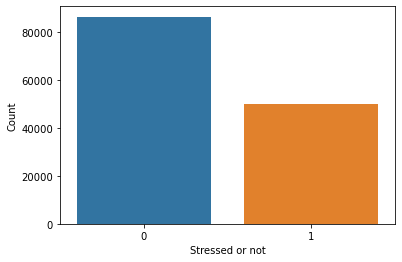

In [120]:
sns.countplot(x='Label', data=uni_data)

plt.xlabel('Stressed or not')
plt.ylabel("Count")

# show the plot
plt.show()

In [123]:
# Separate the features and target variable
X = uni_data.drop('Label', axis=1)
y = uni_data['Label']

# Apply SMOTE to increase some accuracy
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

# Create a new dataframe with the upsampled data
non_samp = pd.concat([pd.DataFrame(X_resampled), pd.DataFrame(y_resampled)], axis=1)
non_samp.columns = uni_data.columns

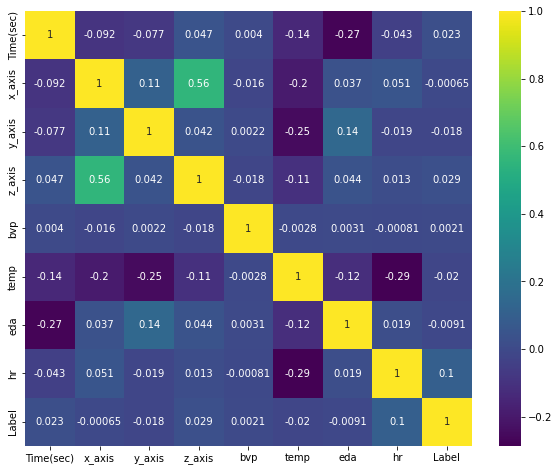

In [124]:
plt.figure(figsize=(10, 8))
sns.heatmap(non_samp.corr().transpose(), cmap='viridis',annot = True)
plt.show()

<Figure size 864x432 with 0 Axes>

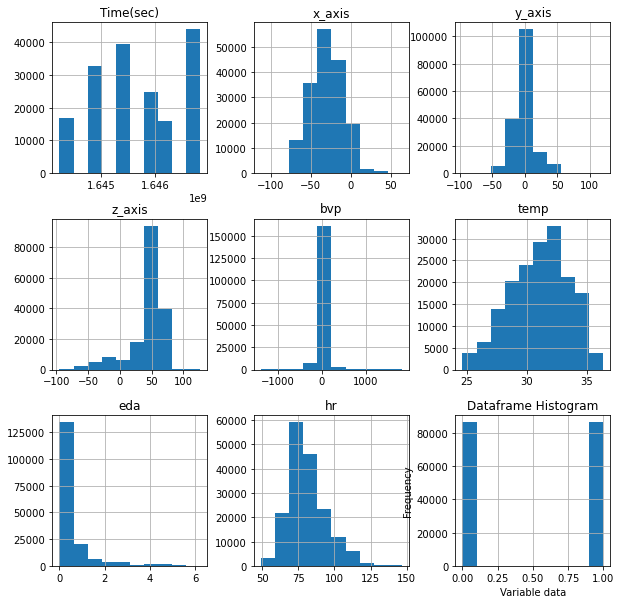

In [125]:
plt.figure(figsize=(12,6))
non_samp.hist(figsize=(10, 10))

# add title and labels
plt.title('Dataframe Histogram')
plt.xlabel('Variable data')
plt.ylabel('Frequency')

# display plot
plt.show()

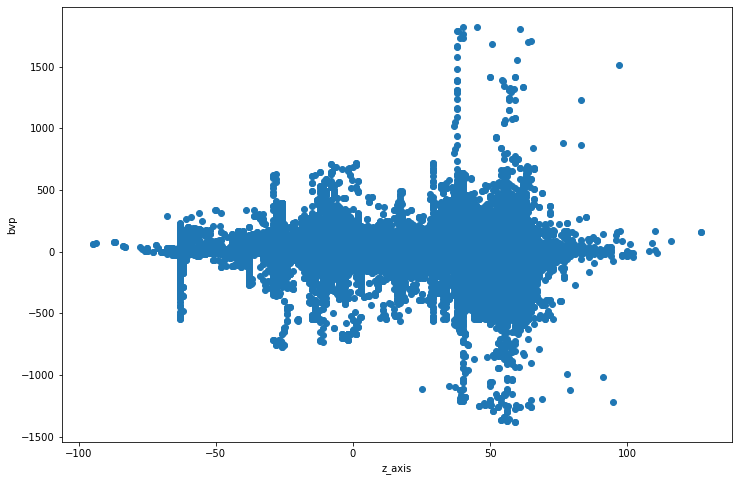

In [126]:
plt.figure(figsize=(12,8))
plt.scatter(non_samp['z_axis'], non_samp['bvp'])
plt.xlabel('z_axis')
plt.ylabel('bvp')
plt.show()

In [127]:

#importing libraries required

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas as pd
import warnings

import pandas as pd

#To impute data for dealing with missing values by using median strategy
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
imputer.fit(non_samp)
data_interpolated = imputer.transform(non_samp)

non_samp = pd.DataFrame(data_interpolated, columns = non_samp.columns)
X = non_samp.iloc[:, :-1].values
y = non_samp.iloc[:, -1].values



# Train a Random Forest model


from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
imputer.fit(non_samp)
data_interpolated = imputer.transform(non_samp)

non_samp = pd.DataFrame(data_interpolated, columns = non_samp.columns)
X = non_samp.iloc[:, :-1].values
y = non_samp.iloc[:, -1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


#Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(non_samp[non_samp.columns[:-1]], non_samp[non_samp.columns[-1]], test_size=0.2)

# Train a Random Forest model
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Random Forest Accuracy: ", accuracy)


from sklearn.model_selection import train_test_split

X_training, X_testing, Y_training, Y_testing = train_test_split(X, y, test_size=0.2)

X_training.shape, Y_training.shape


from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

df_upsampled2 = pd.DataFrame(X_training)

model = linear_model.LinearRegression()

model.fit(X_training, Y_training)


Y_pred = model.predict(X_testing)

# print('Linear Regression Coefficients:', model.coef_)

print('Linear Regression Mean squared error (MSE): %.2f'
      % mean_squared_error(Y_testing, Y_pred))


Random Forest Accuracy:  0.721640841813136
Linear Regression Mean squared error (MSE): 0.25


In [128]:
from sklearn.neighbors import KNeighborsClassifier

In [129]:
from sklearn.metrics import f1_score

# Calculate the F1 score
f1 = f1_score(y_test, y_pred)

# Print the result
print('F1 score:', f1)


F1 score: 0.7234555845946179


In [131]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [132]:
Logistic_regression = LogisticRegression(random_state=0).fit(X_train, y_train)

y_pred_1 = Logistic_regression.predict(X_test)

In [133]:
print(classification_report(y_test, y_pred_1))

              precision    recall  f1-score   support

         0.0       0.50      1.00      0.67     17256
         1.0       0.00      0.00      0.00     17336

    accuracy                           0.50     34592
   macro avg       0.25      0.50      0.33     34592
weighted avg       0.25      0.50      0.33     34592



<AxesSubplot:>

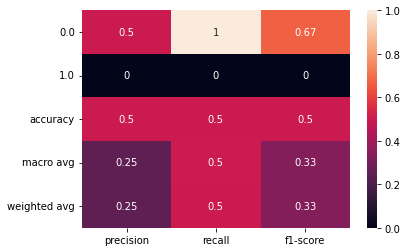

In [134]:
report_1 = classification_report(y_test, y_pred_1,output_dict=True)

sns.heatmap(pd.DataFrame(report_1).iloc[:-1, :].T, annot=True)

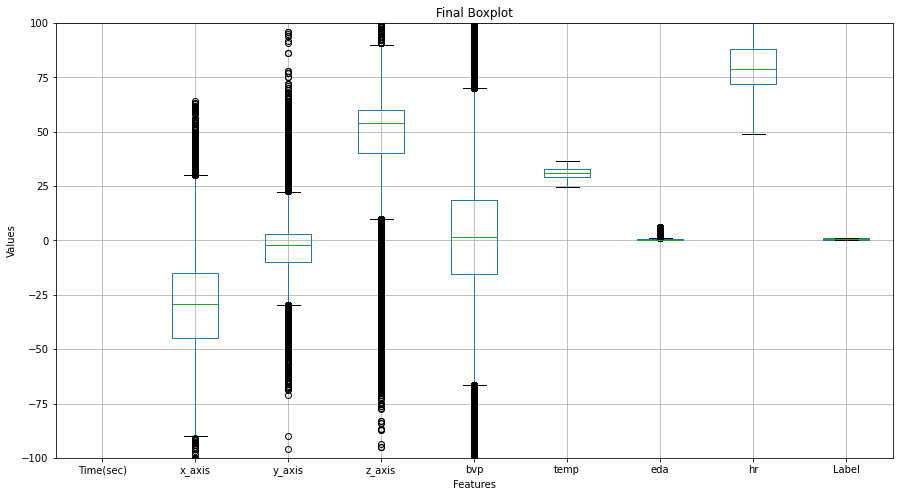

In [130]:
plt.figure(figsize=(15, 8))
non_samp.boxplot()
plt.title('Final Boxplot')
plt.xlabel('Features')
plt.ylim(-100, 100)
# plt.x_lim(-10,-10)
plt.ylabel('Values')
plt.show()